In [ ]:
#%%

import pandas as pd
from IPython.display import display

# Importazione del dataset
df1 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/01_TB1_CProtetta2020.xls")

# Definizione delle ripartizioni geografiche
aree_geografiche = {
    'NORD': ['Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna'],
    'CENTRO': ['Toscana', 'Marche', 'Lazio'],
    'SUD': ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria'],
    'ISOLE': ['Sicilia', 'Sardegna']
}

# Funzione per assegnare l'area geografica
def assegna_area(regione):
    for area, regioni in aree_geografiche.items():
        if regione in regioni:
            return area
    return 'ALTRO'  # per gestire eventuali regioni non mappate

new_columns = [
    'Regione',
    'lunghezza_costa_km_2000',
    'costa_protetta_km_2000',
    'costa_protetta_percentuale_2000',
    'lunghezza_costa_km_2006',
    'costa_protetta_km_2006',
    'costa_protetta_percentuale_2006',
    'lunghezza_costa_km_2020',
    'costa_protetta_km_2020',
    'costa_protetta_percentuale_2020',
    'lunghezza_spiagge_km',
    'quota_spiaggia_percentuale',
    'lunghezza_spiagge_protette_km',
    'componente_spiagge_protette_percentuale',
    'costa_naturale_km',
    'costa_artificiale_km',
    'tratti_fittizi_km'
]

df1.columns = new_columns
df1 = df1.iloc[1:].reset_index(drop=True)

for col in df1.columns:
    if col != 'Regione':
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

df1 = df1.drop(0, axis=0)

# Separa la riga dell'Italia dal resto dei dati
italia_row = df1[df1['Regione'] == 'ITALIA'].copy()
other_rows = df1[df1['Regione'] != 'ITALIA'].copy()

# Aggiungi la colonna dell'area geografica
other_rows['Area_Geografica'] = other_rows['Regione'].apply(assegna_area)

# Ordina prima per area geografica e poi per regione
other_rows = other_rows.sort_values(['Area_Geografica', 'Regione'])

# Escludi la riga "TOTALE"
other_rows = other_rows[other_rows['Area_Geografica'] != 'TOTALE']

# Fai partire l'indice da 1
other_rows.index = other_rows.index + 1

# Crea i DataFrame separati per ogni area geografica
df_nord = other_rows[other_rows['Area_Geografica'] == 'NORD']
df_centro = other_rows[other_rows['Area_Geografica'] == 'CENTRO']
df_sud = other_rows[other_rows['Area_Geografica'] == 'SUD']
df_isole = other_rows[other_rows['Area_Geografica'] == 'ISOLE']

# Visualizza i DataFrame
display(df_nord)
display(df_centro)
display(df_sud)
display(df_isole)

,Regione,lunghezza_costa_km_2000,costa_protetta_km_2000,costa_protetta_percentuale_2000,lunghezza_costa_km_2006,costa_protetta_km_2006,costa_protetta_percentuale_2006,lunghezza_costa_km_2020,costa_protetta_km_2020,costa_protetta_percentuale_2020,lunghezza_spiagge_km,quota_spiaggia_percentuale,lunghezza_spiagge_protette_km,componente_spiagge_protette_percentuale,costa_naturale_km,costa_artificiale_km,tratti_fittizi_km,Area_Geografica
5,Emilia-Romagna,124.000,65.940000,53.177419,124.058,67.079,54.070677,124.841,64.900,51.986126,98.120403,78.596297,51.989477,52.985389,52.453984,8.162440,4.284067,NORD
3,Friuli-Venezia Giulia,115.897,39.490986,34.074209,116.232,42.139,36.254216,115.482,45.069,39.026861,46.712185,40.449754,15.983385,34.216736,20.949389,18.127279,5.992681,NORD
4,Liguria,377.312,123.042957,32.610401,377.510,132.430,35.079865,382.410,144.219,37.713187,105.706633,27.642225,65.054236,61.542246,84.222660,42.854158,17.142374,NORD
2,Veneto,153.810,69.540000,45.211625,159.206,74.222,46.620102,158.732,84.552,53.267142,123.969040,78.099589,55.120049,44.462754,57.654096,10.723651,16.174142,NORD


,Regione,lunghezza_costa_km_2000,costa_protetta_km_2000,costa_protetta_percentuale_2000,lunghezza_costa_km_2006,costa_protetta_km_2006,costa_protetta_percentuale_2006,lunghezza_costa_km_2020,costa_protetta_km_2020,costa_protetta_percentuale_2020,lunghezza_spiagge_km,quota_spiaggia_percentuale,lunghezza_spiagge_protette_km,componente_spiagge_protette_percentuale,costa_naturale_km,costa_artificiale_km,tratti_fittizi_km,Area_Geografica
8,Lazio,383.468,68.322776,17.817074,379.546,73.163,19.276451,385.707,97.356,25.240921,229.879219,59.599442,62.173106,27.045988,68.572483,13.221091,15.562355,CENTRO
7,Marche,177.104,102.872636,58.086004,175.928,115.854,65.853076,178.622,120.725,67.586859,130.261624,72.925857,93.040845,71.426136,97.154057,18.881948,4.688736,CENTRO
6,Toscana,649.638,64.487305,9.926652,646.047,73.061,11.308930,652.037,83.685,12.834394,229.124096,35.139738,44.737979,19.525654,56.366384,15.533802,11.784438,CENTRO


,Regione,lunghezza_costa_km_2000,costa_protetta_km_2000,costa_protetta_percentuale_2000,lunghezza_costa_km_2006,costa_protetta_km_2006,costa_protetta_percentuale_2006,lunghezza_costa_km_2020,costa_protetta_km_2020,costa_protetta_percentuale_2020,lunghezza_spiagge_km,quota_spiaggia_percentuale,lunghezza_spiagge_protette_km,componente_spiagge_protette_percentuale,costa_naturale_km,costa_artificiale_km,tratti_fittizi_km,Area_Geografica
9,Abruzzo,129.014,56.277433,43.621183,129.295,70.854,54.800263,130.077,78.496,60.345795,99.653238,76.610960,57.295704,57.495075,59.032714,15.760827,3.702708,SUD
13,Basilicata,65.783,0.261102,0.396914,65.572,0.978,1.491490,68.728,5.809,8.452159,40.425208,58.819125,4.860644,12.023795,5.006122,0.504455,0.298304,SUD
14,Calabria,734.278,99.064272,13.491385,734.381,111.982,15.248488,745.225,166.867,22.391493,566.841730,76.063166,99.989513,17.639759,110.203024,38.735203,17.929031,SUD
11,Campania,505.373,104.875819,20.752161,502.152,113.500,22.602718,511.456,137.231,26.831438,185.786804,36.325081,58.171657,31.310974,78.018658,41.292019,17.920526,SUD
10,Molise,37.060,19.180229,51.754530,36.621,24.345,66.478250,38.404,25.197,65.610353,33.158709,86.341811,21.326843,64.317471,21.355227,1.909670,1.932193,SUD
12,Puglia,960.819,103.494369,10.771474,957.254,118.026,12.329643,957.533,121.542,12.693244,344.884775,36.018056,54.309004,15.747000,74.800111,29.857492,16.884197,SUD


,Regione,lunghezza_costa_km_2000,costa_protetta_km_2000,costa_protetta_percentuale_2000,lunghezza_costa_km_2006,costa_protetta_km_2006,costa_protetta_percentuale_2006,lunghezza_costa_km_2020,costa_protetta_km_2020,costa_protetta_percentuale_2020,lunghezza_spiagge_km,quota_spiaggia_percentuale,lunghezza_spiagge_protette_km,componente_spiagge_protette_percentuale,costa_naturale_km,costa_artificiale_km,tratti_fittizi_km,Area_Geografica
16,Sardegna,2163.573,67.210000,3.106436,2160.092,88.150,4.080845,2253.952,94.759,4.204127,488.106084,21.655567,27.775657,5.690496,62.953218,22.306835,9.789038,ISOLE
15,Sicilia,1609.164,189.436921,11.772381,1602.822,208.431,13.004002,1625.839,245.800,15.118348,640.590963,39.400639,130.154409,20.317865,156.038486,60.059873,29.956907,ISOLE


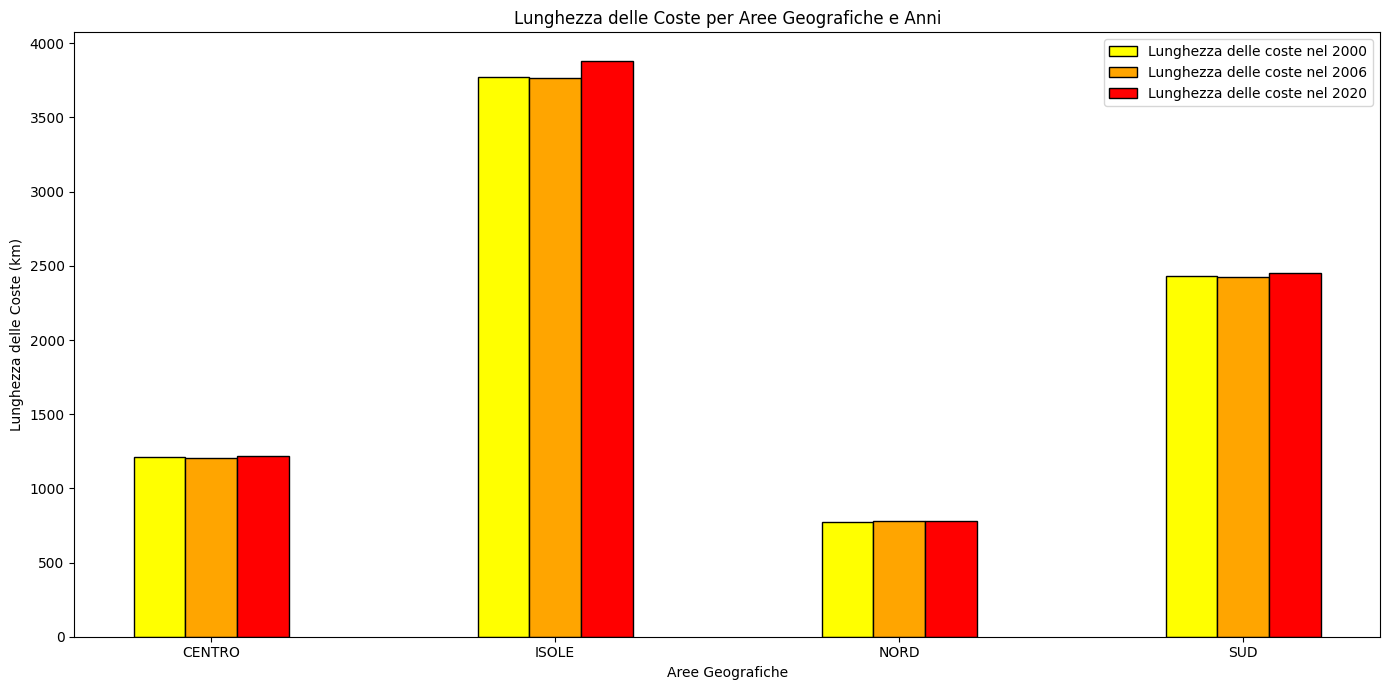

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


df1 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/01_TB1_CProtetta2020.xls")

aree_geografiche = {
    'NORD': ['Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna'],
    'CENTRO': ['Toscana', 'Marche', 'Lazio'],
    'SUD': ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria'],
    'ISOLE': ['Sicilia', 'Sardegna']
}

# Funzione per assegnare l'area geografica
def assegna_area(regione):
    for area, regioni in aree_geografiche.items():
        if regione in regioni:
            return area
 

new_columns = [
    'Regione',
    'lunghezza_costa_km_2000',
    'costa_protetta_km_2000',
    'costa_protetta_percentuale_2000',
    'lunghezza_costa_km_2006',
    'costa_protetta_km_2006',
    'costa_protetta_percentuale_2006',
    'lunghezza_costa_km_2020',
    'costa_protetta_km_2020',
    'costa_protetta_percentuale_2020',
    'lunghezza_spiagge_km',
    'quota_spiaggia_percentuale',
    'lunghezza_spiagge_protette_km',
    'componente_spiagge_protette_percentuale',
    'costa_naturale_km',
    'costa_artificiale_km',
    'tratti_fittizi_km'
]

df1.columns = new_columns
df1 = df1.iloc[1:].reset_index(drop=True)

for col in df1.columns:
    if col != 'Regione':
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

df1 = df1.drop(0, axis=0)

# Separa la riga dell'Italia dal resto dei dati
italia_row = df1[df1['Regione'] == 'ITALIA'].copy()
other_rows = df1[df1['Regione'] != 'ITALIA'].copy()

other_rows['Area_Geografica'] = other_rows['Regione'].apply(assegna_area)

other_rows = other_rows.sort_values(['Area_Geografica', 'Regione'])

# Escludi la riga "TOTALE"
other_rows = other_rows[other_rows['Area_Geografica'] != 'TOTALE']

# Crea un DataFrame aggregato per le aree geografiche e gli anni
df_agg = other_rows.groupby('Area_Geografica').sum()

# Creiamo un array numerico per le aree geografiche
x = np.arange(len(df_agg.index))  # Indici numerici per le aree geografiche

# Plot del grafico a barre
fig, ax = plt.subplots(figsize=(14, 7))

years = ['2000', '2006', '2020']
colors = ['yellow', 'orange', 'red']
width = 0.15  # Larghezza di ogni barra


for i, year in enumerate(years):
    ax.bar(
        x + i * width,  # Utilizziamo l'array numerico invece di una stringa
        df_agg[f'lunghezza_costa_km_{year}'],
        width=width,
        label=f'Lunghezza delle coste nel {year}',
        color=colors[i],
        edgecolor='black'
    )

# Etichette e titolo
ax.set_xlabel('Aree Geografiche')
ax.set_ylabel('Lunghezza delle Coste (km)')
ax.set_title('Lunghezza delle Coste per Aree Geografiche e Anni')
ax.set_xticks(x + width)  # Posizioniamo le etichette delle aree geografiche
ax.set_xticklabels(df_agg.index)  # Assegniamo i nomi delle aree geografiche
ax.legend()

plt.tight_layout()
plt.show()

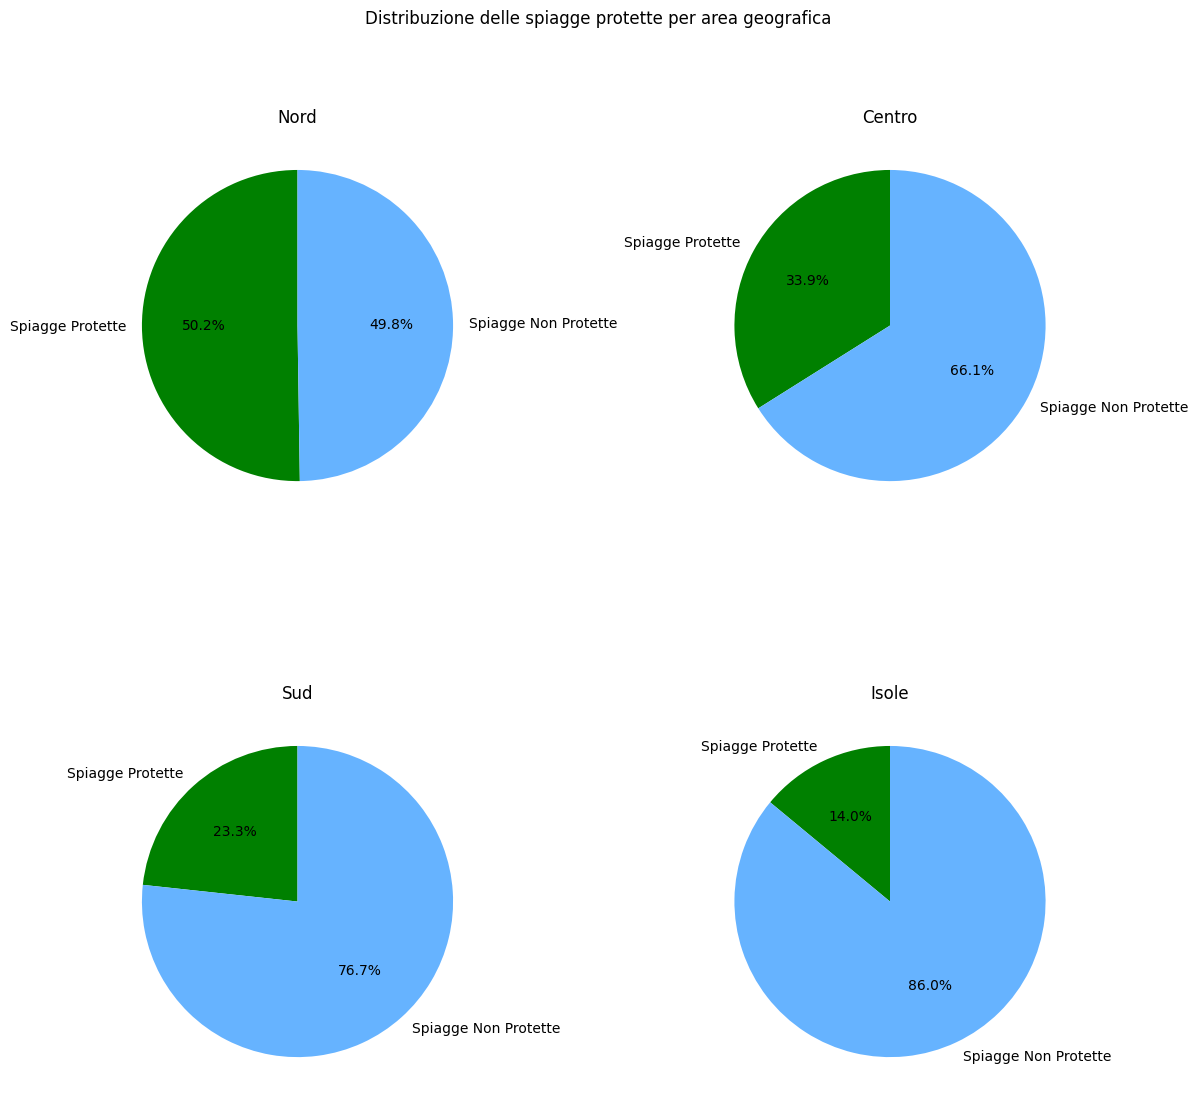

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
 
# Creazione delle figure e degli assi
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
 
# DataFrame Nord
df_nord_filtered = df_nord[df_nord['Regione'] != 'ITALIA']
totale_spiagge_nord = df_nord_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette_nord = df_nord_filtered['lunghezza_spiagge_protette_km'].sum()
sizes_nord = [totale_spiagge_protette_nord, totale_spiagge_nord - totale_spiagge_protette_nord]
labels = ['Spiagge Protette', 'Spiagge Non Protette']
colors = ['green', '#66b3ff']
axs[0, 0].pie(sizes_nord, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 0].set_title('Nord')
 
# DataFrame Centro
df_centro_filtered = df_centro[df_centro['Regione'] != 'ITALIA']
totale_spiagge_centro = df_centro_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette_centro = df_centro_filtered['lunghezza_spiagge_protette_km'].sum()
sizes_centro = [totale_spiagge_protette_centro, totale_spiagge_centro - totale_spiagge_protette_centro]
axs[0, 1].pie(sizes_centro, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 1].set_title('Centro')
 
# DataFrame Sud
df_sud_filtered = df_sud[df_sud['Regione'] != 'ITALIA']
totale_spiagge_sud = df_sud_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette_sud = df_sud_filtered['lunghezza_spiagge_protette_km'].sum()
sizes_sud = [totale_spiagge_protette_sud, totale_spiagge_sud - totale_spiagge_protette_sud]
axs[1, 0].pie(sizes_sud, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 0].set_title('Sud')
 
# DataFrame Isole
df_isole_filtered = df_isole[df_isole['Regione'] != 'ITALIA']
totale_spiagge_isole = df_isole_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette_isole = df_isole_filtered['lunghezza_spiagge_protette_km'].sum()
sizes_isole = [totale_spiagge_protette_isole, totale_spiagge_isole - totale_spiagge_protette_isole]
axs[1, 1].pie(sizes_isole, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 1].set_title('Isole')
 
# Adattiamo il layout
plt.suptitle('Distribuzione delle spiagge protette per area geografica')
plt.tight_layout()
plt.show()

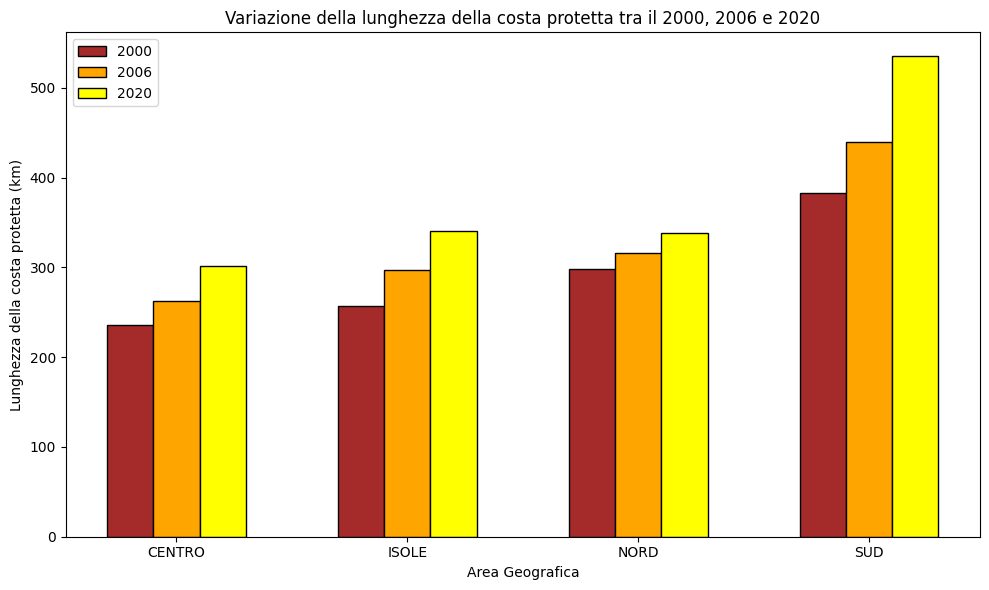

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt


aree_geografiche = {
    'NORD': ['Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna'],
    'CENTRO': ['Toscana', 'Marche', 'Lazio'],
    'SUD': ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria'],
    'ISOLE': ['Sicilia', 'Sardegna']
}


def assegna_area(regione):
    for area, regioni in aree_geografiche.items():
        if regione in regioni:
            return area



df1 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/01_TB1_CProtetta2020.xls")

new_columns = [
    'Regione',
    'lunghezza_costa_km_2000',
    'costa_protetta_km_2000',
    'costa_protetta_percentuale_2000',
    'lunghezza_costa_km_2006',
    'costa_protetta_km_2006',
    'costa_protetta_percentuale_2006',
    'lunghezza_costa_km_2020',
    'costa_protetta_km_2020',
    'costa_protetta_percentuale_2020',
    'lunghezza_spiagge_km',
    'quota_spiaggia_percentuale',
    'lunghezza_spiagge_protette_km',
    'componente_spiagge_protette_percentuale',
    'costa_naturale_km',
    'costa_artificiale_km',
    'tratti_fittizi_km'
]

df1.columns = new_columns
df1 = df1.iloc[1:].reset_index(drop=True)

# Convertiamo le colonne numeriche
for col in df1.columns:
    if col != 'Regione':
        df1[col] = pd.to_numeric(df1[col], errors='coerce')


df1['Area_Geografica'] = df1['Regione'].apply(assegna_area)

df1_filtered = df1[df1['Regione'] != 'ITALIA']


km_2000 = df1_filtered.groupby('Area_Geografica')['costa_protetta_km_2000'].sum()
km_2006 = df1_filtered.groupby('Area_Geografica')['costa_protetta_km_2006'].sum()
km_2020 = df1_filtered.groupby('Area_Geografica')['costa_protetta_km_2020'].sum()

# Lista delle aree geografiche ordinate
Area_Geografica = km_2000.index

# Creazione della figura e degli assi per i sottoplot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2

# Posizioni delle barre sul grafico
r1 = range(len(Area_Geografica))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting dei dati
ax.bar(r1, km_2000, color='brown', width=bar_width, edgecolor='black', label='2000')
ax.bar(r2, km_2006, color='orange', width=bar_width, edgecolor='black', label='2006')
ax.bar(r3, km_2020, color='yellow', width=bar_width, edgecolor='black', label='2020')


ax.set_xlabel('Area Geografica')
ax.set_ylabel('Lunghezza della costa protetta (km)')
ax.set_title('Variazione della lunghezza della costa protetta tra il 2000, 2006 e 2020')
ax.set_xticks([r + bar_width for r in range(len(Area_Geografica))])
ax.set_xticklabels(Area_Geografica, rotation=0)

ax.legend()
plt.tight_layout()
plt.show()

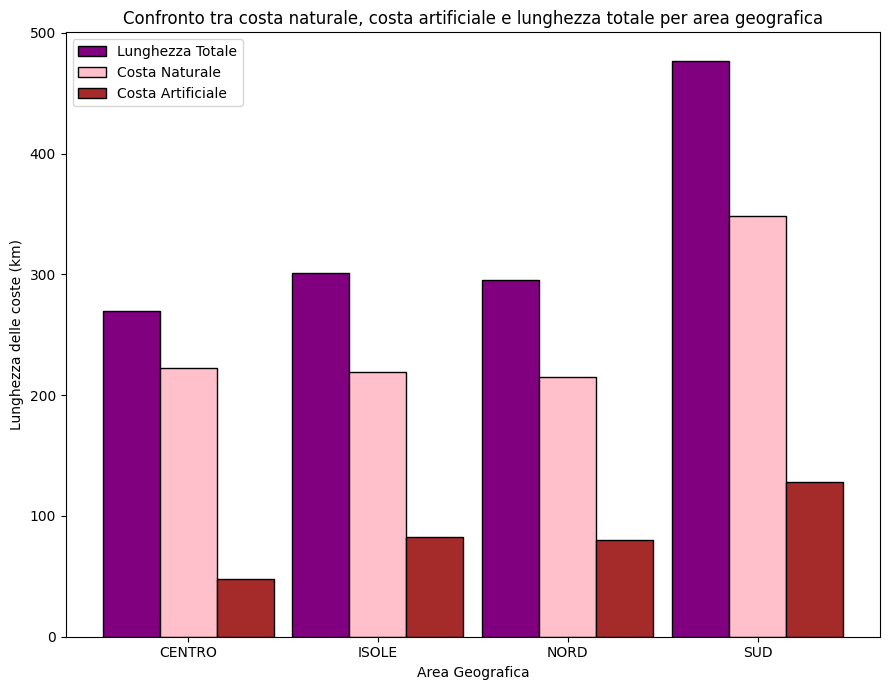

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt

df1_filtered = df1[df1['Regione'] != 'ITALIA']
grouped_data = df1_filtered.groupby('Area_Geografica')[['costa_naturale_km', 'costa_artificiale_km']].sum()

# Estrarre i dati correttamente
Area_Geografica = grouped_data.index  # Ora ha la stessa forma delle altre serie
costa_naturale = grouped_data['costa_naturale_km']
costa_artificiale = grouped_data['costa_artificiale_km']
lunghezza_totale = costa_naturale + costa_artificiale

# Creazione della figura
fig, ax = plt.subplots(figsize=(9, 7))
bar_width = 0.3

# Posizioni delle barre sul grafico
r1 = range(len(Area_Geografica))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting dei dati
ax.bar(r1, lunghezza_totale, color='purple', width=bar_width, edgecolor='black', label='Lunghezza Totale')
ax.bar(r2, costa_naturale, color='pink', width=bar_width, edgecolor='black', label='Costa Naturale')
ax.bar(r3, costa_artificiale, color='brown', width=bar_width, edgecolor='black', label='Costa Artificiale')


ax.set_xlabel('Area Geografica')
ax.set_ylabel('Lunghezza delle coste (km)')
ax.set_title('Confronto tra costa naturale, costa artificiale e lunghezza totale per area geografica', loc='center')
ax.set_xticks([r + bar_width for r in range(len(Area_Geografica))])
ax.set_xticklabels(Area_Geografica, rotation=0)


ax.legend()
plt.tight_layout()
plt.show()